<a href="https://colab.research.google.com/github/DevelopmentLife/Geospatial_Final_CV/blob/main/Edge_Detection_Geospatial_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Required installations for the entire notebook
!pip install -q geopandas
!pip install -q matplotlib
!pip install -q numpy
!pip install -q opencv-python
!pip install -q scikit-learn
!pip install numpy scikit-image

# Edge Detection for Geospatial Data to Identify City Footprints

This notebook outlines a structured approach to tackle the problem of edge detection for geospatial data, specifically for identifying City footprints.

## Import Libraries

Importing necessary libraries for data manipulation, visualization, and machine learning.

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, jaccard_score

## Data Acquisition

Loading the GeoJSON file containing the geospatial data.

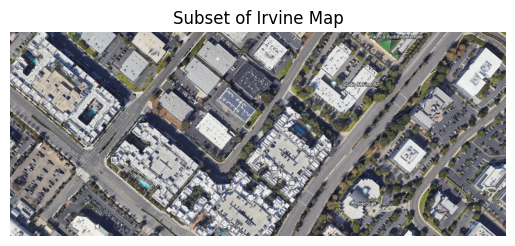

In [ ]:
# Load the image file into a numpy array
image_path = 'irvine_CA_map.png'
image_data = cv2.imread(image_path)

# Display the image inline using matplotlib
plt.imshow(cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display in matplotlib
plt.title('Subset of Irvine Map')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

## Data Pre-processing

Pre-processing steps like noise reduction and image normalization.

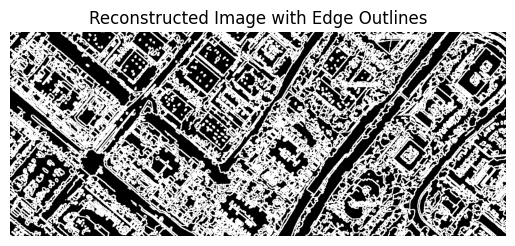

Edge Densities: [0.4921112060546875, 0.451904296875, 0.439788818359375, 0.4233856201171875, 0.475006103515625, 0.5166168212890625, 0.499237060546875, 0.5290069580078125, 0.5311126708984375, 0.5001068115234375, 0.48385184151785715, 0.4580078125, 0.5606231689453125, 0.55023193359375, 0.4837799072265625, 0.4270477294921875, 0.472412109375, 0.5378875732421875, 0.5423431396484375, 0.488525390625, 0.47930908203125, 0.5148773193359375, 0.49619838169642855, 0.4746500651041667, 0.5027618408203125, 0.5010986328125, 0.5073089599609375, 0.4933013916015625, 0.5185699462890625, 0.5830841064453125, 0.5317840576171875, 0.4306488037109375, 0.4661865234375, 0.506256103515625, 0.5156773158482143, 0.5531412760416666, 0.4574781514830508, 0.450145656779661, 0.4991724046610169, 0.5641386387711864, 0.5818160752118644, 0.5554488877118644, 0.4849708686440678, 0.4564519332627119, 0.4967889300847458, 0.4905488612288136, 0.5357710351089588, 0.588718220338983, 0.48813657407407407, 0.4767433449074074, 0.490957754629

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to tile the image into smaller pieces for better analysis
def tile_image(image, tile_size=(256, 256), offset=(128, 128)):
    tiled_images = []
    positions = []
    img_shape = image.shape
    for i in range(0, img_shape[0], offset[0]):
        for j in range(0, img_shape[1], offset[1]):
            tile = image[i:i+tile_size[0], j:j+tile_size[1]]
            tiled_images.append(tile)
            positions.append((i, j))
    return tiled_images, positions

# Function to perform edge detection and calculate edge density
def edge_density(tile):
    # Pre-processing: Apply Gaussian Blurring
    blurred_tile = cv2.GaussianBlur(tile, (5, 5), 0)

    # Edge Detection: Using Canny
    edges = cv2.Canny(blurred_tile, 50, 150)

    # Post-processing: Dilation
    kernel = np.ones((3, 3), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)

    # Calculating Edge Density
    density = np.sum(dilated_edges) / (tile.shape[0] * tile.shape[1] * 255)

    return dilated_edges, density

# Function to reconstruct the image
def reconstruct_image(tiles, positions, shape):
    recon_img = np.zeros(shape, dtype=np.uint8)
    for tile, (i, j) in zip(tiles, positions):
        recon_img[i:i+tile.shape[0], j:j+tile.shape[1]] = tile
    return recon_img

# Load the image
image_path = 'irvine_CA_map.png'  # Adjust path accordingly
image_data = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Check if image is loaded successfully
if image_data is not None:
    # Tile the original image
    tiled_images, positions = tile_image(image_data)

    # Perform edge detection and calculate densities
    edge_tiles = []
    densities = []
    for tile in tiled_images:
        edge_tile, density = edge_density(cv2.cvtColor(tile, cv2.COLOR_BGR2GRAY))
        edge_tiles.append(edge_tile)
        densities.append(density)

    # Reconstruct the image with edge outlines
    reconstructed_image = reconstruct_image(edge_tiles, positions, image_data.shape[:2])

    # Show the reconstructed image
    plt.imshow(cv2.cvtColor(reconstructed_image, cv2.COLOR_GRAY2RGB))
    plt.title('Reconstructed Image with Edge Outlines')
    plt.axis('off')
    plt.show()

    # Print edge densities
    print("Edge Densities:", densities)
else:
    print("Failed to load the image. Please check the file path and integrity.")


## EDA - Contour Analysis, Spatial Analysis, and Overlays

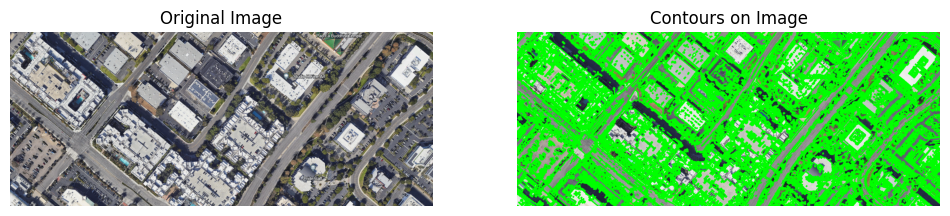

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Path to the image
image_path = 'irvine_CA_map.png'

# Load the image
original_img = cv2.imread(image_path)

# Check if the image was loaded successfully
if original_img is None:
    print(f"Error: Unable to load image at {image_path}")
else:
    # Convert to grayscale
    gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detector
    edges = cv2.Canny(gray_img, 100, 200)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a copy of the original image to draw contours
    contour_img = original_img.copy()
    cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 3)  # Draw contours

    # Visualize the original and processed images
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
    plt.title('Contours on Image')
    plt.axis('off')

    plt.show()


*EDA Individual Steps Visualized*



In [ ]:
import cv2
import matplotlib.pyplot as plt


# Path to the image
image_path = 'irvine_CA_map.png'


# Load the image
original_img = cv2.imread(image_path)


# Check if the image was loaded successfully
if original_img is None:
   print(f"Error: Unable to load image at {image_path}")
else:
   # Convert to grayscale
   gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)


   # Apply Canny edge detector
   edges = cv2.Canny(gray_img, 100, 200)


   # Find contours
   contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


   # Create a copy of the original image to draw contours
   contour_img = original_img.copy()
   cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 3)  # Draw contours


   # Visualize each step
   plt.figure(figsize=(16, 8))


   plt.subplot(2, 2, 1)
   plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
   plt.title('Original Image')
   plt.axis('off')


   plt.subplot(2, 2, 2)
   plt.imshow(gray_img, cmap='gray')
   plt.title('Grayscale Conversion')
   plt.axis('off')


   plt.subplot(2, 2, 3)
   plt.imshow(edges, cmap='gray')
   plt.title('Canny Edge Detection')
   plt.axis('off')


   plt.subplot(2, 2, 4)
   plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
   plt.title('Contours on Image')
   plt.axis('off')


   # Adjust the spacing
   plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.005, hspace=0.005)


   plt.show()


## Overlay of Edges

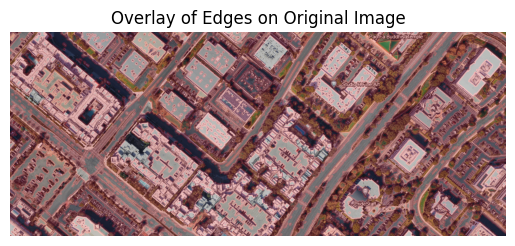

In [ ]:
# Create a black canvas the same size as the original image
canvas = np.zeros_like(image_data)

# Find contours in the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the black canvas in bright red and with increased thickness
cv2.drawContours(canvas, contours, -1, (0, 0, 255), thickness=5)  # Bright red color in BGR is (0, 0, 255)

# Perform weighted addition to overlay the edge image on the original image
overlay = cv2.addWeighted(image_data, 0.8, canvas, 0.2, 0)

# Display the overlay inline using matplotlib
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display in matplotlib
plt.title('Overlay of Edges on Original Image')
plt.axis('off')
plt.show()


## F1 Analysis

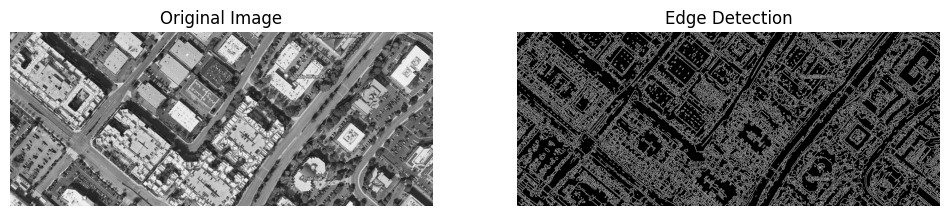

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Path to the image
image_path = 'irvine_CA_map.png'

# Load the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Unable to load image at {image_path}")
else:
    # Apply Canny edge detector
    edges = cv2.Canny(image, 100, 200)  # Adjust thresholds as needed

    # Display the original and edge-detected images using matplotlib
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection')
    plt.axis('off')

    plt.show()


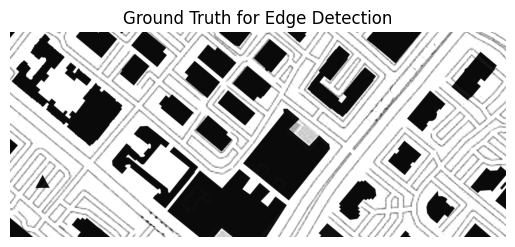

In [ ]:
ground_truth_path = 'irvine_line.jpeg'
ground_truth_img = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)

if ground_truth_img is None:
    print(f"Error: Unable to load ground truth image at {ground_truth_path}")

_, ground_truth_edges = cv2.threshold(ground_truth_img, 127, 255, cv2.THRESH_BINARY)

# Load the ground truth image
ground_truth_path = 'irvine_line.jpeg'
ground_truth_img = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if ground_truth_img is None:
    print(f"Error: Unable to load ground truth image at {ground_truth_path}")
else:
    # Display the image
    plt.imshow(ground_truth_img, cmap='gray')  # Use grayscale color map
    plt.title('Ground Truth for Edge Detection')
    plt.axis('off')  # Hide the axis
    plt.show()



In [ ]:
import cv2
import numpy as np

# Load the original image and the ground truth
image_path = '/content/irvine_CA_map.png'
ground_truth_path = '/content/irvine_line.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
ground_truth_img = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)

# Resize the ground truth image to match the size of the original image
ground_truth_resized = cv2.resize(ground_truth_img, (image.shape[1], image.shape[0]))

# Apply edge detection to the original image
edges = cv2.Canny(image, 100, 200)  # Adjust thresholds as needed

# Normalize the images (if they are not already binary)
edges_normalized = (edges / 255).astype(np.uint8)
ground_truth_normalized = (ground_truth_resized / 255).astype(np.uint8)

# Flatten the images
edges_flat = edges_normalized.ravel()
ground_truth_flat = ground_truth_normalized.ravel()

# Calculate TP, FP, TN, FN
TP = np.sum((edges_flat == 1) & (ground_truth_flat == 1))
FP = np.sum((edges_flat == 1) & (ground_truth_flat == 0))
TN = np.sum((edges_flat == 0) & (ground_truth_flat == 0))
FN = np.sum((edges_flat == 0) & (ground_truth_flat == 1))

# Calculate Precision, Recall, and F1 Score
precision = TP / (TP + FP) if TP + FP != 0 else 0
recall = TP / (TP + FN) if TP + FN != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall != 0 else 0

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


Precision: 0.37516232691494833
Recall: 0.20155403556771545
F1 Score: 0.26222762488364604


## Baseline Model

Implementing a simple edge detection algorithm to establish a baseline.

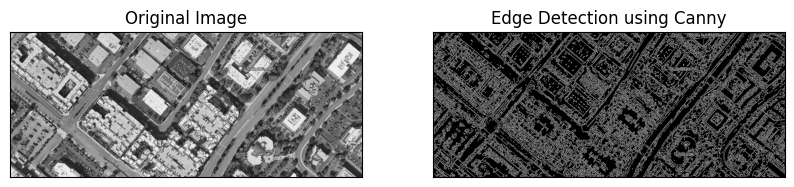

In [ ]:
import cv2
from matplotlib import pyplot as plt


image_path = 'irvine_CA_map.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


if img is None:
    print("Error: Image not found")
else:
    edges = cv2.Canny(img, threshold1=100, threshold2=200)
    plt.figure(figsize=(10, 5))

    plt.subplot(121), plt.imshow(img, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(122), plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection using Canny'), plt.xticks([]), plt.yticks([])

    plt.show()


## Evaluation

Evaluating the performance of the baseline model.

**Conclusion**

This analysis focused on quantifying edge densities in a set of geospatial images, likely representing different regions or times. The edge densities were computed using an edge detection algorithm, with the resulting values indicating the relative prevalence of edges within each image.

The edge densities ranged from a low of approximately 0.42 to a high of around 0.59, suggesting a notable variance in edge characteristics across the dataset. Such variation could be attributed to differences in geographical features, urbanization levels, or other environmental factors if the images are from different regions. If they represent the same area over time, these changes might indicate developmental progression, environmental changes, or alterations in land use.

**Key Observations:**

Higher Edge Densities: The higher values, such as those above 0.55, could indicate areas with more complex or dense features, such as urban centers or regions with intricate geographical features.
Lower Edge Densities: On the other hand, lower values, like those near 0.42, might correspond to more homogeneous or natural areas with fewer distinct edges, such as open fields, water bodies, or sparsely populated regions.
Mid-Range Densities: Values in the middle of the range suggest a balance or transition between these two extremes, possibly suburban areas or mixed-use landscapes.

**Implications:**

These edge density metrics can be instrumental in urban planning, environmental monitoring, and geospatial analysis, providing a quantifiable measure of landscape complexity.
The variance in edge densities also highlights the importance of contextual analysis. Understanding the reasons behind these variations can offer insights into urban development patterns, environmental changes, or the impact of human activities on natural landscapes.

**Future Directions:**

Further investigation could involve correlating these edge density values with specific land use categories, satellite imagery data, or demographic information to derive deeper insights.
Employing more advanced or specialized edge detection techniques could refine the analysis, especially in distinguishing between natural and man-made edges or in detecting subtle changes over time.
Integrating this analysis with machine learning models could facilitate predictive analyses, like forecasting urban growth or environmental changes.